# **<font color = '#3498eb'>OBJETIVES</font>**

· This cosmetics e-commerce has experienced flat growth over the past few months and, in general terms, aims to increase the number of conversions and the AOV (Average Order Value).

· We want to create an RFM (Recency, Frequency, Monetary Value) segmentation and a recommendation system (Identify which products we want to put in front of every client).

· We want to optimize every step of the customer journey (awareness, consideration, purchase, retention, and recommendation).

· Optimize the campaigns.

· Optimize the product catalog.

# **<font color = '#3498eb'>SECTOR, COMPANY</font>**

# **<font color = '#3498eb'>SOME QUESTIONS TO START THE ANALYSIS</font>**

- **Customer Journey**

· What is the typical buying process.

· In each session, how many products are viewed, added to the cart, abandoned, and purchased.

· What has been the trend of these indicators in recent months.

- **Clients**

· How many products does each customer purchase.

· How much does each customer spend.

· Are there "best customers" that we want to identify and treat differently?

· Are customers making repeat purchases in subsequent months?

· What is the average LTV of a customer?

· Can we create personalized campaigns, taking into account the LTV of the customer?

- **Products**

· Which products are most frequently purchased?

· Are there products that are not being purchased?

· Is there a correlation between product price and purchase volume?

· Are there products that are viewed but not purchased?

· Are there products that are removed from the shopping cart?

· Can we make personalized product recommendations for each customer?

# **<font color = '#3498eb'>LIBRARIES</font>**

In [5]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config IPCompleter.greedy=True

# **<font color = '#3498eb'>DATA LOADING AND UNDERSTANDING</font>**

In [2]:
conn_sqlite = sa.create_engine(r'sqlite:///F:\GDrive_DATA\DS4B\DS_MASTERY\02_BUSINESS_ANALYTICS\07_CASOS\CASO3_OPTIMIZACIÓN_ECOMMERCE\ecommerce.db')

In [4]:
inspect(conn_sqlite).get_table_names()

['2019-Dec', '2019-Nov', '2019-Oct', '2020-Feb', '2020-Jan']

In [3]:
oct19 = pd.read_sql('2019-Oct', conn_sqlite)
nov19 = pd.read_sql('2019-Nov', conn_sqlite)
dec19 = pd.read_sql('2019-Dec', conn_sqlite)
jan19 = pd.read_sql('2020-Jan', conn_sqlite)
feb19 = pd.read_sql('2020-Feb', conn_sqlite)

In [5]:
df_ecom = pd.concat([oct19, nov19, dec19, jan19, feb19], axis=0)

df_ecom

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,68,2019-10-01 00:01:46 UTC,view,5843665,1487580005092295511,None,f.o.x,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,72,2019-10-01 00:01:55 UTC,cart,5868461,1487580013069861041,None,italwax,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,95,2019-10-01 00:02:50 UTC,view,5877456,1487580006300255120,None,jessnail,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,122,2019-10-01 00:03:41 UTC,view,5649270,1487580013749338323,None,concept,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,124,2019-10-01 00:03:44 UTC,view,18082,1487580005411062629,None,cnd,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...,...,...,...
429785,4156660,2020-02-29 23:58:49 UTC,cart,5815662,1487580006317032337,None,None,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,4156663,2020-02-29 23:58:57 UTC,view,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,4156668,2020-02-29 23:59:05 UTC,cart,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,4156675,2020-02-29 23:59:28 UTC,view,5817692,1487580010872045658,None,None,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


user_id: is a unique identifier for each user, stored as an int64.

user_session: represents the unique session ID for user activities, stored as an object (usually a string).

event_type: specifies the type of user interaction (e.g., 'view', 'cart', 'purchase'), stored as an object (usually a string).

event_time: captures the timestamp of when the event occurred, stored as an object (could be converted to datetime for time-series analysis).

category_id: is an identifier for each product category, stored as an int64.

category_code: contains the code or name of the product category, stored as an object (usually a string).

brand: indicates the brand name of the product, stored as an object (usually a string).

product_id: is a unique identifier for each product, stored as an int64.

price: represents the price of the product, stored as a float64.

# **<font color = '#3498eb'>DATA QUALITY</font>**

### Variable analysis

In [ ]:
df_ecom.info()

In [6]:
# I delete the index column

df_ecom.drop(columns='index', inplace=True)

In [3]:
# Convert event_time to datetime

df_ecom.event_time = pd.to_datetime(df_ecom.event_time)

### Null Management

In [12]:
null_count  = df_ecom.isna().sum().sort_values(ascending=False)
null_percentage = (df_ecom.isnull().mean() * 100).sort_values(ascending=False).astype(int)

df_nulls = pd.DataFrame({'Null_Count':null_count, 'Null_Percentage':null_percentage})

df_nulls

,Null_Count,Null_Percentage
category_code,2060411,98
brand,891646,42
user_session,506,0
event_time,0,0
event_type,0,0
product_id,0,0
category_id,0,0
price,0,0
user_id,0,0


In [4]:
# I remove two variables and the null values from the user_session

df_ecom = df_ecom.drop(columns=["category_code", "brand"]).dropna()

df_ecom

,event_time,event_type,product_id,category_id,price,user_id,user_session
0,2019-10-01 00:01:46+00:00,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,2019-10-01 00:01:55+00:00,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,2019-10-01 00:02:50+00:00,view,5877456,1487580006300255120,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,2019-10-01 00:03:41+00:00,view,5649270,1487580013749338323,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,2019-10-01 00:03:44+00:00,view,18082,1487580005411062629,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...
2095071,2020-02-29 23:58:49+00:00,cart,5815662,1487580006317032337,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
2095072,2020-02-29 23:58:57+00:00,view,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
2095073,2020-02-29 23:59:05+00:00,cart,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
2095074,2020-02-29 23:59:28+00:00,view,5817692,1487580010872045658,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


### Analysis of Numerical variables 

In [7]:
df_ecom['price'].describe().round(2)

count    2094570.00
mean           8.42
std           19.14
min          -47.62
25%            2.05
50%            4.00
75%            6.86
max          327.78
Name: price, dtype: float64

In [11]:
# Let's see how many prices are zero or negative

df_ecom[df_ecom['price'] <= 0].shape[0]

20544

In [14]:
# Are these rows associated with a specific product?

df_ecom[df_ecom['price'] <= 0]['product_id'].unique()


array([5892052, 5889621, 5889622, ..., 5824841, 5826413, 5832437],
      dtype=int64)

In [16]:
# I remove  all the rows with zero or negative prices

df_ecom = df_ecom[df_ecom['price'] > 0]

### Analysis of Categorical variables

In [17]:
df_ecom.event_type.value_counts()

event_type
view                961558
cart                574547
remove_from_cart    410357
purchase            127564
Name: count, dtype: int64

In [19]:
# How many unique categories are there?

df_ecom.category_id.nunique()

508

In [20]:
# How many unique products are there?

df_ecom.product_id.nunique()

45327

### Index

In [ ]:
# Let's set 'event_time' as the index

df_ecom.set_index('event_time', inplace=True)

In [23]:
df_ecom.head(2)

,event_type,product_id,category_id,price,user_id,user_session
event_time,,,,,,
2019-10-01 00:01:46+00:00,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
2019-10-01 00:01:55+00:00,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1


# **<font color = '#3498eb'>DATA TRANSFORMATION</font>**

To conduct a more thorough analysis, I'll break down the components of event_time, include local holidays in the EEUU and incorporate days of special commercial interest.

### Components of event_time

In [2]:
def date_components(dataframe):
    date = dataframe.index.date
    year = dataframe.index.year
    month = dataframe.index.month
    day = dataframe.index.day
    hour = dataframe.index.hour
    minute = dataframe.index.minute
    second = dataframe.index.second
    
    return(pd.DataFrame({'date':date, 'year':year,'month':month, 'day':day, 'hour':hour, 'minute':minute, 'second':second}))

In [12]:
df_ecom = pd.concat([df_ecom.reset_index(), date_components(df_ecom)], axis=1).set_index('event_time')

In [29]:
df_ecom.head(2)

,event_type,product_id,category_id,price,user_id,user_session,date,year,month,day,hour,minute,second,date,year,month,day,hour,minute,second
event_time,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:46+00:00,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,2019-10-01,2019,10,1,0,1,46,2019-10-01,2019,10,1,0,1,46
2019-10-01 00:01:55+00:00,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,2019-10-01,2019,10,1,0,1,55,2019-10-01,2019,10,1,0,1,55


### Local holidays in EEUU

In [ ]:
%conda install -c conda-forge holidays -y

In [10]:
import holidays

holidays_eeuu = holidays.US(years=2020)

In [ ]:
# I'll add a variable that will indicate whether the record falls on a holiday or not

df_ecom['holiday'] = df_ecom.date.apply(lambda record: 1 if (record in holidays_eeuu) else 0)

In [16]:
df_ecom[df_ecom.holiday == 1].date.value_counts()

date
2019-11-28    22560
2020-02-17    15911
2020-01-20    15328
2019-10-14    13662
2019-11-11    13520
2019-12-25    11046
2020-01-01     7644
Name: count, dtype: int64

### Days of special commercial interest

Since this is a cosmetics e-commerce, I will mark the records for dates that are especially significant for the target audience. My hypothesis is that around these dates we should see an increase in sales.

In [21]:
df_ecom['black_friday'] = 0
df_ecom['2019-11-29','black_friday'] = 1

df_ecom['valentines_day'] = 0
df_ecom.loc['2019-02-14', 'valentines_day'] = 1
df_ecom.loc['2020-02-14', 'valentines_day'] = 1

df_ecom['mothers_day'] = 0
df_ecom.loc['2019-05-12', 'mothers_day'] = 1
df_ecom.loc['2020-05-10', 'mothers_day'] = 1

df_ecom['cyber_monday'] = 0
df_ecom.loc['2019-12-02', 'cyber_monday'] = 1
df_ecom.loc['2020-11-30', 'cyber_monday'] = 1

df_ecom['womens_day'] = 0
df_ecom.loc['2019-03-08', 'womens_day'] = 1
df_ecom.loc['2020-03-08', 'womens_day'] = 1

df_ecom['halloween'] = 0
df_ecom.loc['2019-10-31', 'halloween'] = 1
df_ecom.loc['2020-10-31', 'halloween'] = 1

df_ecom['prime_day'] = 0
df_ecom.loc['2019-07-15', 'prime_day'] = 1
df_ecom.loc['2020-10-13', 'prime_day'] = 1

df_ecom['christmas'] = 0
df_ecom.loc['2019-12-25', 'christmas'] = 1
df_ecom.loc['2020-12-25', 'christmas'] = 1

df_ecom['new_years_eve'] = 0
df_ecom.loc['2019-12-31', 'new_years_eve'] = 1
df_ecom.loc['2020-12-31', 'new_years_eve'] = 1

In [19]:
df_ecom.head(2)

,event_type,product_id,category_id,price,user_id,user_session,date,year,month,day,...,second,holiday,valentines_day,mothers_day,cyber_monday,womens_day,halloween,prime_day,christmas,new_years_eve
event_time,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:46+00:00,view,5843665.0,1.487580e+18,9.44,462033176.0,a18e0999-61a1-4218-8f8f-61ec1d375361,2019-10-01,2019.0,10.0,1.0,...,46.0,0.0,0.0,0,0,0,0,0,0,0
2019-10-01 00:01:55+00:00,cart,5868461.0,1.487580e+18,3.57,514753614.0,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,2019-10-01,2019.0,10.0,1.0,...,55.0,0.0,0.0,0,0,0,0,0,0,0


In [23]:
df_ecom['valentines_day'].value_counts()

valentines_day
0    2061781
1      12246
Name: count, dtype: int64

# **<font color = '#3498eb'>ANALYSIS AND INSIGHTS</font>**

## UNDERSTANDING EVENTS

### How does the customer journey work?

I created this function to automate funnel analysis with new data.

In [6]:
%pip install plotly

In [9]:
# This function takes the values from the event_type variable as input

def funnel_analytics(event_type_variable):
    
    # Storing the counts of all the event_type values in this variable
    event_types_value_counts = df_ecom['event_type'].value_counts()
    
    # Creating variables to calculate percentages
    kpi_views_perc = 100
    kpi_cart_perc = (event_types_value_counts['cart'] / event_types_value_counts['view']) * 100
    kpi_removed_perc = (event_types_value_counts['remove_from_cart'] / event_types_value_counts['cart']) * 100
    kpi_purchase_perc = (event_types_value_counts['purchase'] / event_types_value_counts['cart']) * 100
    
    df_ecom_kpis = pd.DataFrame({'kpi': ['views', 'cart', 'purchase'], 'percentage': [kpi_views_perc, kpi_cart_perc, kpi_purchase_perc]}).round(1)
    
    # Creating the graphic
    from plotly import graph_objects as go
    fig = go.Figure(go.Funnel(y=df_ecom_kpis['kpi'], x=df_ecom_kpis['percentage'].round(2), marker={'color': ['red', 'yellow', 'green']}, opacity=0.4))
    fig.show()
    
    # Printing a report with conclusions
    print(f"{kpi_cart_perc.round(1)}% of viewed products are added to the cart, leaving a {100 - kpi_cart_perc.round(1)}% of views that need to be converted into cart additions.\n")
    print(f"{kpi_purchase_perc.round(1)}% of cart items are purchased, leaving a {100 - kpi_purchase_perc.round(1)}% that needs to be converted into actual purchases.\n")


In [10]:
funnel_analytics(df_ecom.event_type)

59.8% of viewed products are added to the cart, leaving a 40.2% of views that need to be converted into cart additions.

22.2% of cart items are purchased, leaving a 77.8% that needs to be converted into actual purchases.



### On average, how many products are viewed, added to the cart, abandoned and purchased in each session?

We have just looked at the customer journey on a broad scale for this e-commerce site; now we're going to examine the averages in each session.


In [17]:
# First I am going to create a df at the user_session-event_type level

ecom_us_et = df_ecom.groupby(['user_session', 'event_type']).product_id.count()

ecom_us_et

user_session                          event_type
0000597b-de39-4a77-9fe5-02c8792ca14e  view          3
0000645a-8160-4a3d-91bf-154bff0a22e3  view          2
000090e1-da13-42b1-a31b-91a9ee5e6a88  view          1
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b  view          1
0000de26-bd58-42c9-9173-4763c76b398e  view          1
                                                   ..
ffff6695-b64d-4a67-aa14-34b3b7f63c3f  view          2
ffff7d69-b706-4c64-9d6d-da57a04bc32b  view          1
ffff8044-2a22-4846-8a72-999e870abbe9  view          1
ffff91d4-7879-4a4b-8b26-c67915a27dc8  view          1
ffffbe0a-d2c2-47c7-afab-680bfdfda50d  view          1
Name: product_id, Length: 581763, dtype: int64

In [18]:
# I will use the values of the `event_type` variable as columns.

df_ecom_us_et = ecom_us_et.unstack().fillna(0)

df_ecom_us_et

event_type,cart,purchase,remove_from_cart,view
user_session,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,0.0,0.0,0.0,3.0
0000645a-8160-4a3d-91bf-154bff0a22e3,0.0,0.0,0.0,2.0
000090e1-da13-42b1-a31b-91a9ee5e6a88,0.0,0.0,0.0,1.0
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,0.0,0.0,0.0,1.0
0000de26-bd58-42c9-9173-4763c76b398e,0.0,0.0,0.0,1.0
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,0.0,0.0,0.0,2.0
ffff7d69-b706-4c64-9d6d-da57a04bc32b,0.0,0.0,0.0,1.0
ffff8044-2a22-4846-8a72-999e870abbe9,0.0,0.0,0.0,1.0


In [19]:
#  I will reorder the columns from left to right to reflect the sequence in which the actions actually occur

df_ecom_us_et = df_ecom_us_et[['view','cart','remove_from_cart','purchase']]

df_ecom_us_et

event_type,view,cart,remove_from_cart,purchase
user_session,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,3.0,0.0,0.0,0.0
0000645a-8160-4a3d-91bf-154bff0a22e3,2.0,0.0,0.0,0.0
000090e1-da13-42b1-a31b-91a9ee5e6a88,1.0,0.0,0.0,0.0
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,1.0,0.0,0.0,0.0
0000de26-bd58-42c9-9173-4763c76b398e,1.0,0.0,0.0,0.0
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,2.0,0.0,0.0,0.0
ffff7d69-b706-4c64-9d6d-da57a04bc32b,1.0,0.0,0.0,0.0
ffff8044-2a22-4846-8a72-999e870abbe9,1.0,0.0,0.0,0.0


In [21]:
# I calculate the average of each event type per session. These are the numbers we need to improve

df_ecom_us_et.mean().round(1)

event_type
view                2.2
cart                1.3
remove_from_cart    0.9
purchase            0.3
dtype: float64

### Are there differences in events by the hour?

In [10]:
# First I am going to create a df at the event_type-hour level

ecom_et_hour = df_ecom.groupby(['event_type', 'hour']).product_id.count()

ecom_et_hour

event_type  hour
cart        0        6475
            1        5555
            2        6433
            3        8544
            4       11242
                    ...  
view        19      63730
            20      57311
            21      38905
            22      23043
            23      13307
Name: product_id, Length: 96, dtype: int64

In [25]:
# I will use the values of the `event_type` variable as columns

ecom_et_hour = ecom_et_hour.unstack(level=0)

ecom_et_hour.sort_values(by='purchase', ascending=False)

event_type,cart,purchase,remove_from_cart,view
hour,,,,
11,33284,8495,25496,57594
12,34258,8250,23714,57530
18,36435,8211,30551,59533
13,31996,8133,22852,55534
10,32901,7816,23982,56458
9,32095,7593,21680,54185
19,39609,7435,27666,63730
20,34828,7256,24985,57311
8,29526,7158,21156,49587


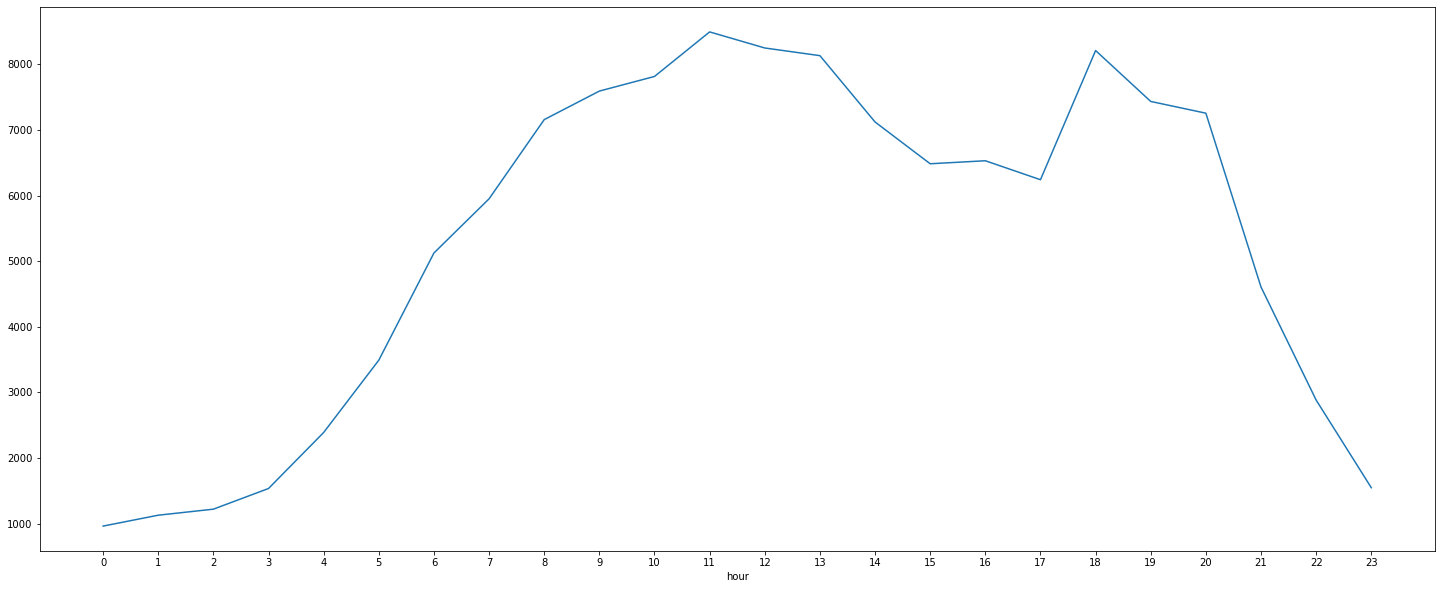

In [33]:
ecom_et_hour['purchase'].plot(figsize=(25, 10))
plt.xticks(range(0, 24));

**INSIGHT 1: The majority of purchases are made between 11 a.m. and 1 p.m. as well as at 7 p.m.**

### On average, what is the monthly revenue?

In [36]:
df_ecom.loc[df_ecom.event_type == 'purchase'].groupby('month').price.sum().mean().astype(int)

124309

### In the latest month, what is the trend?

In [49]:
df_ecom_trend = df_ecom.groupby("event_type").resample('W').event_type.count().unstack(level=0)

df_ecom_trend.sort_values('purchase', ascending=False)

event_type,cart,purchase,remove_from_cart,view
event_time,,,,
2019-11-24 00:00:00+00:00,38069,9754,27973,56477
2019-12-01 00:00:00+00:00,31994,7493,23106,48883
2020-02-02 00:00:00+00:00,29193,7120,21102,52432
2020-01-19 00:00:00+00:00,28402,6913,22945,50210
2019-11-10 00:00:00+00:00,29142,6663,24008,46177
2020-01-26 00:00:00+00:00,26353,6359,18544,48478
2020-02-16 00:00:00+00:00,27836,6332,22601,47213
2020-02-23 00:00:00+00:00,25619,6000,18146,43627
2019-12-15 00:00:00+00:00,24636,5953,18246,45874


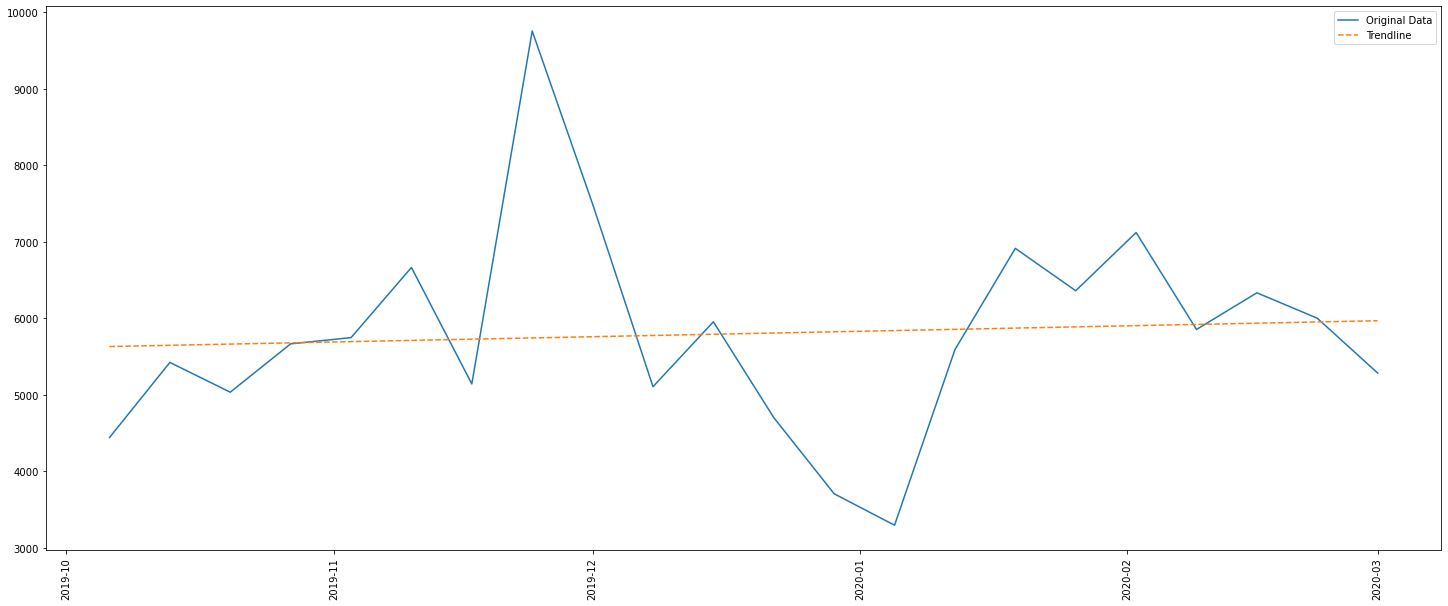

In [56]:
# Extract x and y data for plotting
x_data = np.arange(len(df_ecom_trend.index))
y_data = df_ecom_trend['purchase'].values

slope, intercept = np.polyfit(x_data, y_data, 1)
line = slope * x_data + intercept

plt.figure(figsize=(25, 10))
plt.plot(df_ecom_trend.index, df_ecom_trend['purchase'], label='Original Data')
plt.plot(df_ecom_trend.index, line, label='Trendline', linestyle='--')
plt.xticks(rotation=90)
plt.legend();

In [59]:
# Calculate the percentage change
start_point = line[0]
end_point = line[-1]

percentage_change = ((end_point - start_point) / start_point) * 100

percentage_change.astype(int)

5

Statista says that the global cosmetic market (not the ecom one) https://www.statista.com/statistics/297070/growth-rate-of-the-global-cosmetics-market/

### What are the days and hours when most purchases are made?

## UNDERSTANDING CLIENTS

### Introduccion

### How are customers distributed based on their spending?

### How are customers distributed based on the number of purchases?

### On average, how many products does a customer buy in a single purchase?

### Which customers generated the most revenue?

### What is the LTV (Lifetime Value) of customers?

### Which customers are most valuable for targeting in future campaigns?

## UNDERSTANDING PRODUCTS?

### Introduccion

### What are the most purchased products?

### Are there products that haven't been purchased and can be removed from the catalog?

### What is the correlation between the price of a product and its sales volume?

### Are there products that are more frequently removed from the cart?

### What are the most viewed products?

### Are there products that are viewed frequently but not purchased?

### Building a product recommendation system

# **<font color = '#3498eb'>CONCLUSIONS</font>**

# **<font color = 'purple'>I save all the work I did today</font>**

In [60]:
# 5/10/2023 15:06
df_ecom.to_pickle('F:\\GDrive_DATA\\DS4B\\DS_MASTERY\\02_BUSINESS_ANALYTICS\\07_CASOS\\CASO3_OPTIMIZACIÓN_ECOMMERCE\\df_ecomNoindex.pickle')

In [3]:
pd.set_option('display.max_columns', None)

In [9]:
df_ecom = pd.read_pickle('F:\\GDrive_DATA\\DS4B\\DS_MASTERY\\02_BUSINESS_ANALYTICS\\07_CASOS\\CASO3_OPTIMIZACIÓN_ECOMMERCE\\df_ecomNoindex.pickle')

df_ecom.head(2)

,event_type,product_id,category_id,price,user_id,user_session,date,year,month,day,hour,minute,second,holiday,valentines_day,mothers_day,cyber_monday,womens_day,halloween,prime_day,christmas,new_years_eve,black_friday
event_time,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:46+00:00,view,5843665,1487580005092295424,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,2019-10-01,2019,10,1,0,1,46,0,0,0,0,0,0,0,0,0,0
2019-10-01 00:01:55+00:00,cart,5868461,1487580013069861120,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,2019-10-01,2019,10,1,0,1,55,0,0,0,0,0,0,0,0,0,0
